In [5]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from IPython.display import display, Math 
import numpy as np
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt

In [6]:
  # téléchargement de la structure des bandes électroniques du matériau

with MPRester("1dFKRUfD65SqW4BO") as m: 
    bandes = m.get_bandstructure_by_material_id("mp-862631")

## Structure des bandes électroniques

In [8]:
# récupération de données nécessaires

bandplot = BSPlotter(bandes) # pour avoir des données et graphes des structures de bandes
info = bandplot.bs_plot_data() # enregistre des données sous forme de dictionnaire 
dist0 = info.get("ticks").get("distance") # les distances du parcours par rapport à l'origine
energies = info.get("energy").get("1") # les énergies des bandes sur les segments du parcours
pts0 = info.get("ticks").get("label") # liste des points sommets des segments du parcous
val= info.get("vbm")
cond = info.get("cbm")
vbm = bandes.get_vbm() # permet de trouver la dernière bande de valence
cbm = bandes.get_cbm() # permet de trouver la première bande de conduction

In [9]:
# ajustement des listes dist et pts car des données sont en doubles
dist = np.array([dist0[0], dist0[1], dist0[3], dist0[5], dist0[7], dist0[9], dist0[11], dist0[13], dist0[15], dist0[17], dist0[18]])
pts = np.array([pts0[0], pts0[1], pts0[3], pts0[5], pts0[7], pts0[9], pts0[11], pts0[13], pts0[15], pts0[17], pts0[18]])

 Voici d'abord un graphe général de la structure des bandes électroniques du Ba2SbAu, en fonction du parcours dans la première zone de Brillouin.


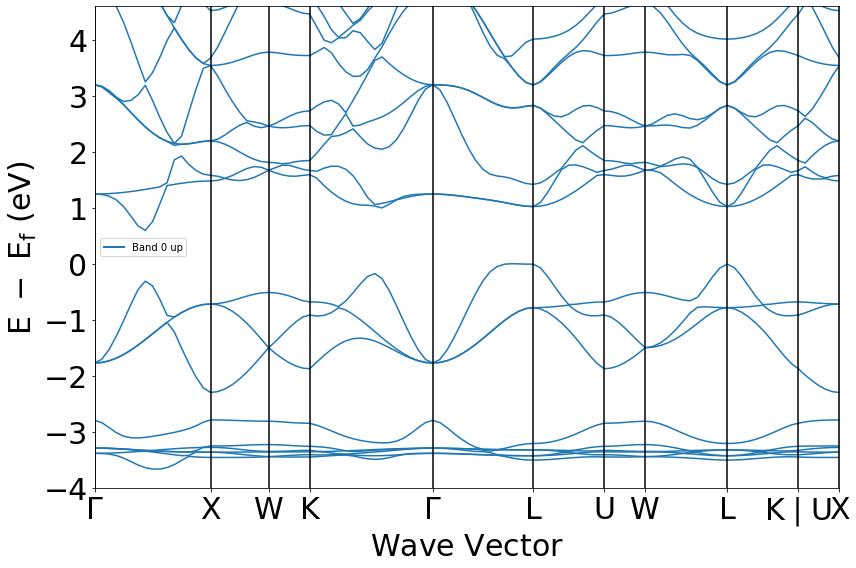

In [10]:
# visualisation globale

print(" Voici d'abord un graphe général de la structure des bandes électroniques du Ba2SbAu, en fonction du parcours dans la première zone de Brillouin.")
bandplot.show()

#### Bande interdite

Voici quelques informations à propos de la bande interdite:
{'direct': False, 'energy': 0.5956999999999999, 'transition': '(0.393,0.393,0.393)-(0.219,0.000,0.219)'}

 On y apprend l'énergie de la bande interdite: 0.595699 eV. Et que le gap est indirecte; comme on peut le voir sur le graphe ci-dessous, sur lequel sont mis en évidence le maximum des bandes de valence et le minimum des bandes de conduction.
La bande interdite est également mise en exergue sur le graphe.


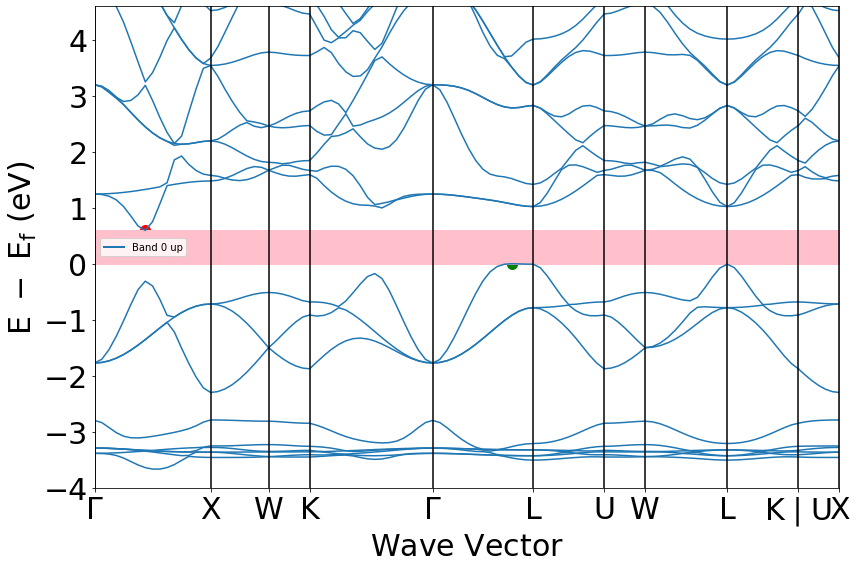

In [11]:
# bande interdite

print("Voici quelques informations à propos de la bande interdite:")
print(bandes.get_band_gap())
print("\n On y apprend l'énergie de la bande interdite: 0.595699 eV. Et que le gap est indirecte; comme on peut le voir sur le graphe ci-dessous, sur lequel sont mis en évidence le maximum des bandes de valence et le minimum des bandes de conduction.")
print("La bande interdite est également mise en exergue sur le graphe.")
plot = bandplot.get_plot(vbm_cbm_marker=True)
plot.fill_between(np.linspace(dist[0],dist[-1]),val[0][1],cond[0][1],color='pink')
plot.show()

#### Directions de dispersion

In [16]:
# les dispersions
print("Rechercher les directions de plus grande et plus faible dispersion des bandes électroniques correspond à chercher, sur \nle graphe, les directions de plus forte et plus faible pentes entre les énergies des points sommets des segments du parcours.")

dr = dist[1:] - dist[:-1] # distance relative entre chaque point du parcours
n = len(dr)

Rechercher les directions de plus grande et plus faible dispersion des bandes électroniques correspond à chercher, sur 
le graphe, les directions de plus forte et plus faible pentes entre les énergies des points sommets des segments du parcours.


La direction de plus grande dispersion de la dernière bande de valence est: $\Gamma$ - L; avec une valeur de pente de 2.700249.
La direction de plus faible dispersion de la dernière bande de valence est: K$\mid$U - X; avec une valeur de pente de 0.138288.
Elles sont représentées sur le graphe ci-dessous; la direction de forte dispersion en violet et de faible dispersion en vert.


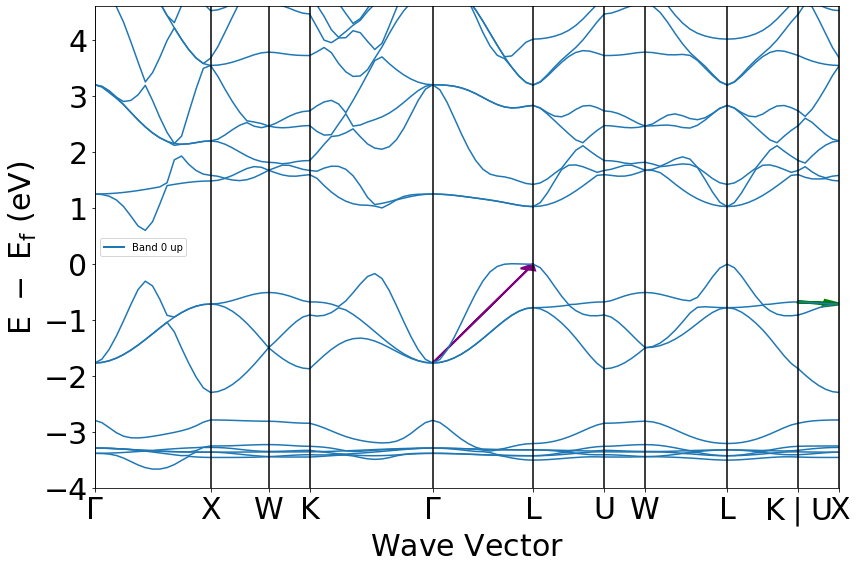

In [17]:
# pour la dernière bande de valence

idxV = 17 # indice de la dernière bande de valence (obtenu dans bandes.get_vbm())

pent = np.zeros(n) 
for i in range(n): # calcul des pentes de chaque segment du parcours
    pent[i] = np.abs((energies[i][idxV][-1] - energies[i][idxV][0]) /dr[i])
    
pentmax = np.max(pent)
pentmin = np.min(pent)
imax = np.where(pent == pentmax)[0][0] # indice du max dans la liste pent
imin = np.where(pent == pentmin)[0][0] # indice du min dans la liste pent

print("La direction de plus grande dispersion de la dernière bande de valence est: {0} - {1}; avec une valeur de pente de {2:.6f}.".format(pts[imax],pts[imax+1],pentmax))
print("La direction de plus faible dispersion de la dernière bande de valence est: {0} - {1}; avec une valeur de pente de {2:.6f}.".format(pts[imin],pts[imin+1],pentmin))
print("Elles sont représentées sur le graphe ci-dessous; la direction de forte dispersion en violet et de faible dispersion en vert.")

# affichage des directions
plot = bandplot.get_plot()
plot.arrow(dist[imax], energies[imax][idxV][0], dr[imax], energies[imax][idxV][-1]-energies[imax][idxV][0], head_width=0.1, head_length=0.1, linewidth=2, color='purple', length_includes_head=True)
plot.arrow(dist[imin], energies[imin][idxV][0], dr[imin], energies[imin][idxV][-1]-energies[imin][idxV][0], head_width=0.1, head_length=0.1, linewidth=3, color='g', length_includes_head=True)
plot.show()

La direction de plus grande dispersion de la première bande de conduction est: L - U; avec une valeur de pente de 1.232881.
La direction de plus faible dispersion de la première bande de conduction est: W - K; avec une valeur de pente de 0.295690.
Elles sont représentées sur le graphe ci-dessous; la direction de forte dispersion en violet et de faible dispersion en vert.


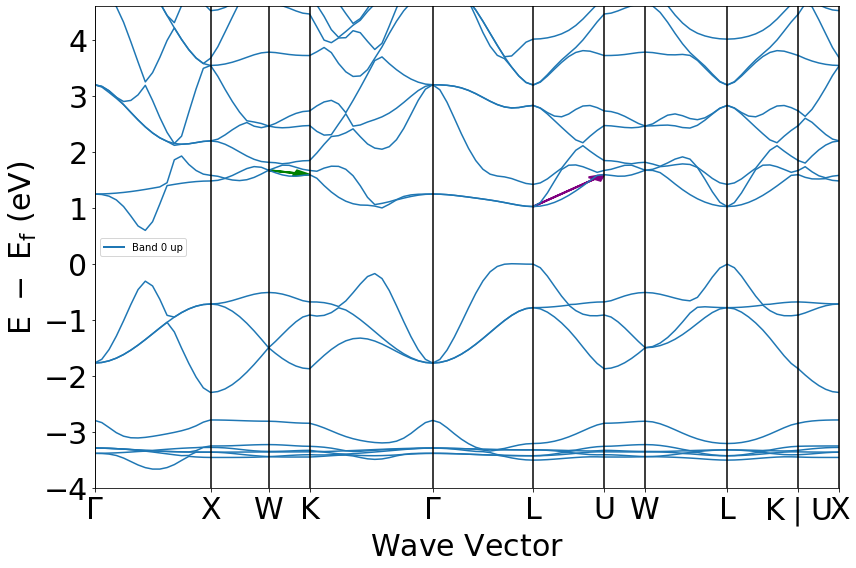

In [18]:
# pour la première bande de conduction

idxC = 18 # indice de la première bande de conduction (obtenu dans bandes.get_cbm())

pent = np.zeros(n) 
for i in range(n): # calcul des pentes de chaque segment du parcours
    pent[i] = np.abs((energies[i][idxC][-1] - energies[i][idxC][0]) /dr[i])
    
pentmax = np.max(pent)
pentmin = np.min(pent)
imax = np.where(pent == pentmax)[0][0] # indice du max dans la liste pent
imin = np.where(pent == pentmin)[0][0] # indice du min dans la liste pent

print("La direction de plus grande dispersion de la première bande de conduction est: {0} - {1}; avec une valeur de pente de {2:.6f}.".format(pts[imax],pts[imax+1],pentmax))
print("La direction de plus faible dispersion de la première bande de conduction est: {0} - {1}; avec une valeur de pente de {2:.6f}.".format(pts[imin],pts[imin+1],pentmin))
print("Elles sont représentées sur le graphe ci-dessous; la direction de forte dispersion en violet et de faible dispersion en vert.")

# affichage des directions
plot = bandplot.get_plot()
plot.arrow(dist[imax], energies[imax][idxC][0], dr[imax], energies[imax][idxC][-1]-energies[imax][idxC][0], head_width=0.1, head_length=0.1, linewidth=2, color='purple', length_includes_head=True)
plot.arrow(dist[imin], energies[imin][idxC][0], dr[imin], energies[imin][idxC][-1]-energies[imin][idxC][0], head_width=0.1, head_length=0.1, linewidth=2, color='g', length_includes_head=True)
plot.show()

## Masses effectives

Pour finir, les masses effectives au sommet de la dernière bande de valence et à la base de la première bande de conduction vont être calculées, en supposant une dispersion parabolique autour de ces points. La masse effective peut se calculer grâce la formule suivante:
$ \frac{1}{m*}$ = $\frac{1}{\hbar^2}$ $\frac{\partial^2 E}{\partial k^2}$

où $m*$ est la masse effective, $k$ le vecteur d'onde, $E$ l'énergie en fonction de ce vecteur d'onde, et $\hbar$ la constante de Planck réduite ($\frac{h}{2\pi}$).

In [19]:
# obtention des paraboles d'approximation

# dernière bande de valence

yv1 = np.max(energies[4][idxV]) # le maximum se trouve sur le 5e segment de parcours (voir graphe)
i = np.where(energies[4][idxV] == yv1)[0][0] 
inc= (dist[5]-dist[4]) / len(energies[4][idxV]) # incrément de distance pour chaque indice de ce segment d'énergie
xv1 = dist[4] + i*inc # distance du point maximum par rapport à l'origine

yv2 = energies[4][idxV][i-2] # un point à gauche du max
xv2 = dist[4] + (i-2)*inc
yv3 = energies[4][idxV][i+2] # un point à droite du max
xv3 = dist[4] + (i+2)*inc
Xv = [xv2,xv1,xv3] # les abcisses des 3 points pour la parabole
Yv = [yv2,yv1,yv3] # les ordonnées des 3 points pour la parabole
coefv = np.polyfit(Xv,Yv,2) # pour avoir les coefficient de l'équation de la parabole



# première bande de conduction

yc1 = np.min(energies[0][idxC]) # le minimum se trouve sur le 1er segment de parcours (voir graphe)
i = np.where(energies[0][idxC] == yc1)[0][0] 
inc= (dist[1]-dist[0]) / len(energies[0][idxC]) # incrément de distance pour chaque indice de ce segment d'énergie
xc1 = dist[0] + i*inc # distance du point minimum par rapport à l'origine

yc2 = energies[0][idxC][i-1] # un point à gauche du min
xc2 = dist[0] + (i-1)*inc
yc3 = energies[0][idxC][i+2] # un point à droite du min
xc3 = dist[0] + (i+2)*inc
Xc = [xc2,xc1,xc3] # les abcisses des 3 points pour la parabole
Yc = [yc2,yc1,yc3] # les ordonnées des 3 points pour la parabole
coefc = np.polyfit(Xc,Yc,2) # pour avoir les coefficient de l'équation de la parabole


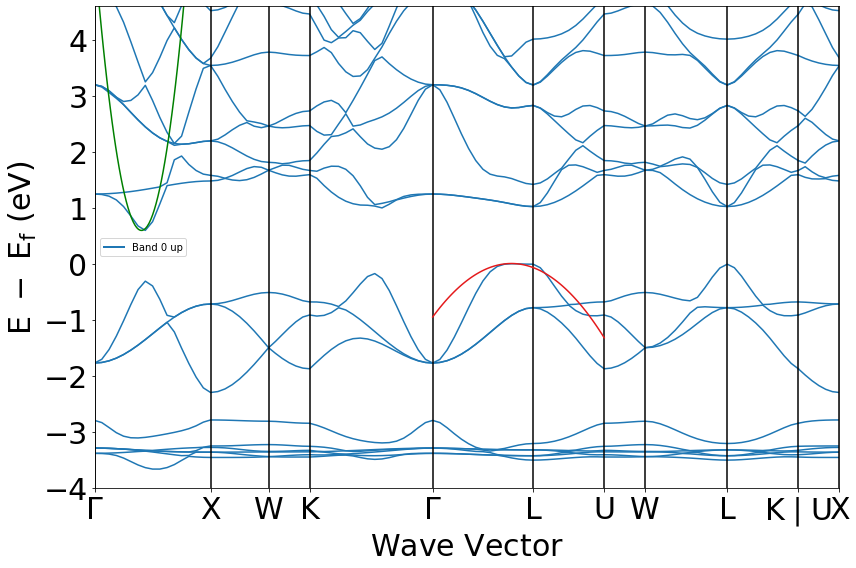

Ci-dessus sont représentées les paraboles d'approximation des dispersions. En rouge celle du maximum de la dernière bande de   valence et en vert celle du minimum de la première bande de conduction.


In [20]:
# affichage des paraboles

av = np.linspace(dist[4],dist[6],100)
bv = np.poly1d(coefv) # représente le polynôme pour la parabole du sommet de valence

ac = np.linspace(dist[0],dist[2],100)
bc = np.poly1d(coefc) # représente le polynôme pour la parabole de la base de conduction

plt = bandplot.get_plot()
plt.plot(av,bv(av))
plt.plot(ac,bc(ac),color='g')
plt.show()
print("Ci-dessus sont représentées les paraboles d'approximation des dispersions. En rouge celle du maximum de la dernière bande de   valence et en vert celle du minimum de la première bande de conduction.")

In [22]:
# calcul des masses effectives

print("Grâce à ces approximations, la dérivée seconde de l'énergie selon le vecteur d'onde est simplement obtenue comme deux fois le  coefficient du seconde degré du polynôme décrivant la parabole.")
print("Les calculs de la masse effective s'en trouvent donc fortement simplifiés. \n")

# valeurs nécessaires
devdk2 = 2*coefv[0]
decdk2 = 2*coefc[0]
hbar = 1.054571818*10**(-34)  # Constante de Planck réduite [Js = kg*m^2/s]
ev = 1.602176563*10**(-19)  # électronVolt [J = kg*m^2/s^2]
A = 10**(-10)  # Aangström [m]

mv = devdk2/(hbar**2)
mv = 1/mv
mc = decdk2/(hbar**2)
mc = 1/mc


print("En appliquant la formule précédemment écrite il est obtenu: ")
print("- au sommet de la dernière bande de valence: m* = " + str(mv) +"[J².s²/eV.A²]")
print("- à la base de la première bande de conduction: m* = " + str(mc) +"[J².s²/eV.A²]")
print("\nAttention cependant qu'il est nécessaire de convertir les unités d'électronVolt et d'Aangstrôm respectivement en Joules et en  mètres, afin d'obtenir la valeur réelle de la masse effective en kg.")

print("\nSont finalement obtenues les valeurs de masse effective suivantes:")

mv0 = mv/(ev*A*A)
mc0 = mc/(ev*A*A)
print("- au sommet de la dernière bande de valence: m* = " + str(mv0) +"[kg]")
print("- à la base de la première bande de conduction: m* = " + str(mc0) +"[kg]")

Grâce à ces approximations, la dérivée seconde de l'énergie selon le vecteur d'onde est simplement obtenue comme deux fois le  coefficient du seconde degré du polynôme décrivant la parabole.
Les calculs de la masse effective s'en trouvent donc fortement simplifiés. 

En appliquant la formule précédemment écrite il est obtenu: 
- au sommet de la dernière bande de valence: m* = -1.5273450017436663e-69[J².s²/eV.A²]
- à la base de la première bande de conduction: m* = 1.0472647157570794e-70[J².s²/eV.A²]

Attention cependant qu'il est nécessaire de convertir les unités d'électronVolt et d'Aangstrôm respectivement en Joules et en  mètres, afin d'obtenir la valeur réelle de la masse effective en kg.

Sont finalement obtenues les valeurs de masse effective suivantes:
- au sommet de la dernière bande de valence: m* = -9.532938110664812e-31[kg]
- à la base de la première bande de conduction: m* = 6.536512516424068e-32[kg]
